# DSCI 100 Group 10: Project Proposal

## Group Members:
- Mohammed Samiul ISLAM SAMI, 58031451
- Narjis Alhusseini, 66272287
- Add name
- Add name 

# Title: Predicting diabetic patients using the concentration of Glucose, Insulin, and BMI as predictors. 

## Introduction
This data is about female diabetic patients of ages 21 of the Pima Indian heritage.
- Pregnancies (the number of pregnancies the patient had)
    - Column name: **pregnancies**
- Glucose (Plasma glucose concentration, a 2 hour oral glucose tolerance test. $mg/dL$)
    - Column name: **glucose**
- Blood Pressure (Diastolic blood pressure in $mm\,Hg$)
    - Column name: **blood_pressure**
- Skin Thickness (Triceps skin fold thickness in $mm$)
    - Column name: **skin_thickness**
- Insulin (2 Hour serum insulin in $\mu U/mL$)
    - Column name: **insulin**
- BMI (Body Mass Index in $kg/m^2$)
    - Column name: **bmi**
- Diabetes pedigree function (Probability that a patient will have diabetes based on family history)
    - Column name: **dpf**
- Age (years)
    - Column name: **age**
- Outcome (a boolean value of whether they have diabetes, 1 is diabetic and 0 is non-diabetic)
    - Column name: **outcome**



UCI Machine Learning (2016). Pima Indians Diabetes Database. *kaggle*. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

## Exploratory data analysis
The data does have some missing values where they opted to use 0 instead. Additionally there are some inconsistency in the data frame which need to be corrected to better fit the conventions and content we have been learning in DSCI 100. To start our exploratory data analysis, we first load our needed libraries and load the data into R using read_csv().

In [1]:
library(tidyverse)
library(ggplot2)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# This data downloaded from kaggle, https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv.
# The csv file was downloaded and loaded onto github and the jupyter.
download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


To follow the convention we have been using in DSCI 100, we have decided to change the column names all to lower case with underscores separating each word for the expection of the column **DiabetesPedigreeFunction** which will abbreviated to **dpf**. Additionally, we will change all the 0s in all columns except: **pregnancies** and **outcome** and change the 0s and 1s in the **outcome** column to something human-reabable. Finally, notice that **Outcome** is treated as a double instead of a factor; this is incorrect since outcome is a class variable.

In [3]:
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")
head(diabetes_data)

class(diabetes_data$outcome) = "chr"
head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

diabetes_data <- diabetes_data |>
                 mutate(outcome = as.factor(outcome))

head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,diabetic
1,85,66,29,NA,26.6,0.351,31,non-diabetic
8,183,64,NA,NA,23.3,0.672,32,diabetic
1,89,66,23,94,28.1,0.167,21,non-diabetic
0,137,40,35,168,43.1,2.288,33,diabetic
5,116,74,NA,NA,25.6,0.201,30,non-diabetic


In [5]:
diabetes_mean0 <- diabetes_data |>
                 filter(outcome == "non-diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "non-diabetic")
diabetes_mean1 <- diabetes_data |>
                 filter(outcome == "diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "diabetic")
diabetes_means <- diabetes_mean0 |>
                  add_row(diabetes_mean1)
diabetes_means

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.298000,110.6439,68.18400,27.23546,130.2879,30.85967,0.429734,31.19000,non-diabetic
4.865672,142.3195,70.82463,33.00000,206.8462,35.40677,0.550500,37.06716,diabetic


Here we can see some idea of how can a person with diabetes differ from a person without. The pregnancies, blood glucose level, insulin levels of the non-diabetic is generally lower. The average glucose level according to Kudva (2023) for a fasting person (glucose tests were taken when they were fasting) is less than 100 $mg/dL$ and under 125 $mg/dL$ is prediabetes, anything over could be diabetes. 

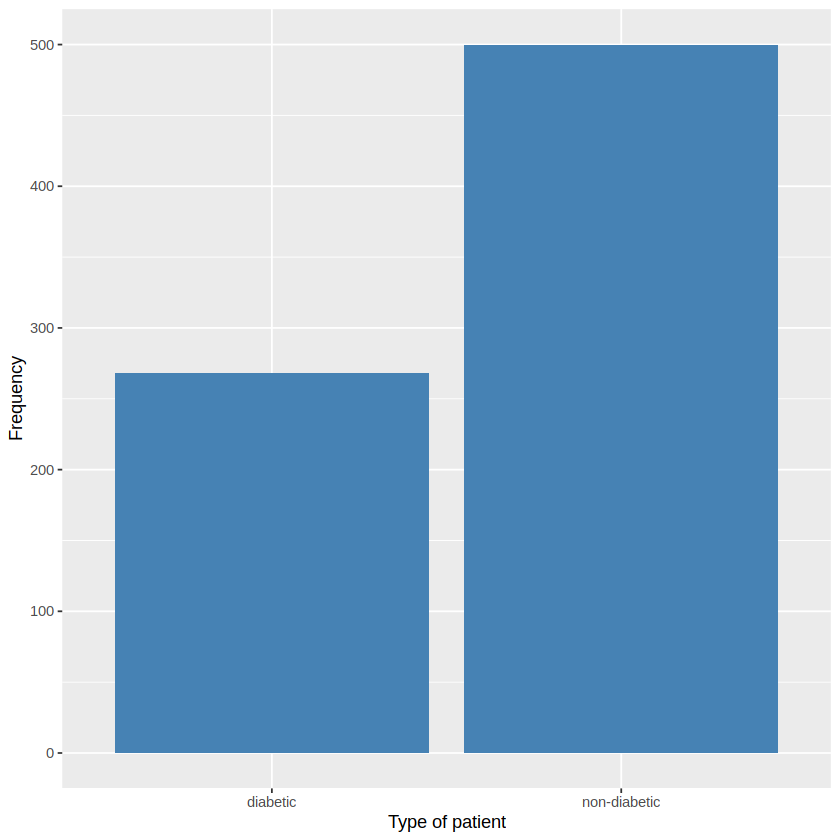

In [6]:
# Since we will be using K-nearest algorithm to classify whether a observation is diabetic or not, 
# we should see whether there is vast difference in amount of the data for both sides.
diabetes_count <- diabetes_data |>
                  group_by(outcome) |>
                  summarize(count = n())

count_plot <- ggplot(diabetes_count,aes(x=outcome,y=count)) +
              geom_bar(stat = "identity", fill="steelblue") +
              labs(x = "Type of patient", y = "Frequency")
count_plot

As shown here, there is a bias in the data, therefore when using the K-nearest algorithm we should adjust the data such that equal parts are being used.

Warning message:
“Removed 375 rows containing missing values (`geom_point()`).”


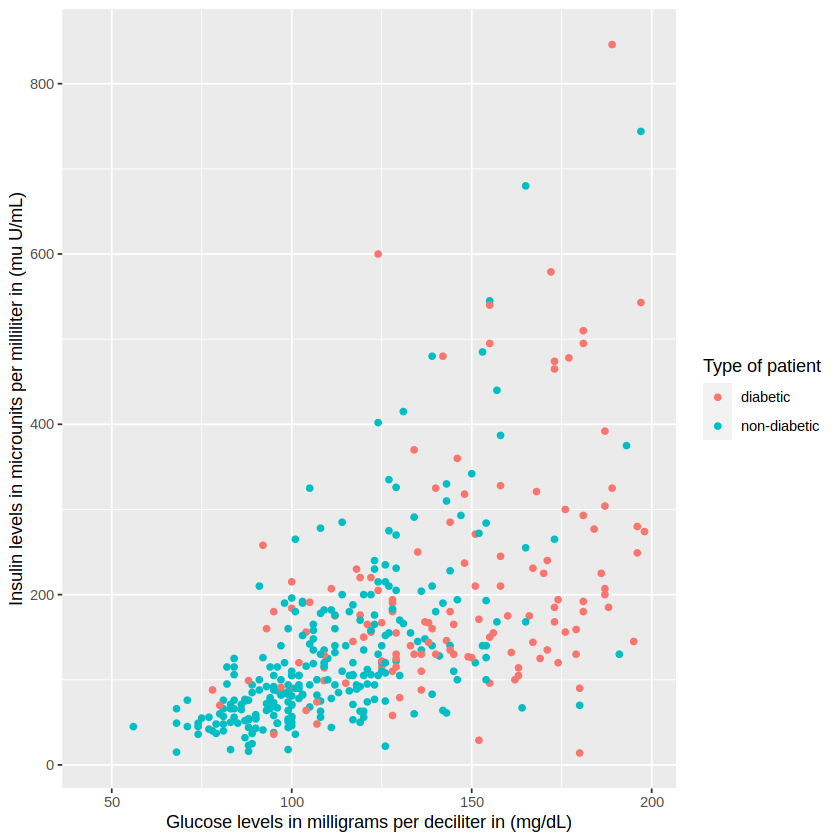

In [7]:
diabetic_explore <- ggplot(diabetes_data, aes(x = glucose, y = insulin)) +
                    geom_point(aes(color = outcome)) +
                    labs(x = "Glucose levels in milligrams per deciliter in (mg/dL)",
                         y = "Insulin levels in microunits per milliliter in (mu U/mL)",
                         color = "Type of patient")
diabetic_explore

Here we are able to see that there is a small relation between of two of the predictors, but there doesnt seem to a clear relation to whether a patient is diabetic or not.

## Methods

## Citations

Kudva Y. (2023). Diabetes. *Mayo Clinic*. https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451
UCI Machine Learning (2016). Pima Indians Diabetes Database. *kaggle*. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv